# Wine Quality Prediction With Supervised Learning

## 1. Introduction

In this study, we use a dataset from the University of California, Irvine, containing chemical features of different types of Vinho Verde from the north of Portugal. It also includes a quality score between 0 and 10. The data is divided into two files: one for red wines and one for white wines. For this study, we combine the two and attempt to classify the "high" quality wines from the "low" quality wines.

We will use various supervised learning models to find the best model to predict “high” and “low” quality wines based on their chemical features.

The main steps of our analysis include:

1.	Data Preparation: Cleaning and preprocessing the data to ensure its quality and consistency.

2.	Exploratory Data Analysis: Visualizing and understanding the distribution and relationships of the features.

3.	Baseline Modeling: Implementing and evaluating initial models using various supervised machine learning algorithms with default hyperparameters.

4.	Hyperparameter Tuning: Optimizing the models to improve their performance.

5.	Results: Comparing the different models used and analyzing the results of the best model found.


### Import modules and data

In [93]:
# modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# tools
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

# let pandas display wider columns - necessary for model parameters later
pd.set_option('display.max_colwidth', 150)

## 2. Data: Preparation and analysis

### Importing and cleaning data

The initial step involves importing the data and checking for any duplicates or invalid entries. The dataset is composed of 3,961 white wines and 1,359 red wines. Each dataset has identical columns, which facilitates merging them into a single dataframe. Before the merge, we add a binary 'type' column, where 0 represents red wine and 1 represents white wine, allowing us to differentiate between the two types after merging. After removing duplicate entries, we combine the two dataframes into one unified dataset. To enhance readability, we move the 'quality' label to the end of the dataframe.

In [94]:
# Import raw data
white_df = pd.read_csv('data/winequality-white.csv', sep=';')
red_df = pd.read_csv('data/winequality-red.csv', sep=';')

In [95]:
print("White:")
print(f"\tShape: {white_df.shape}")
print(f"\tDupes: {white_df.duplicated().sum()}")
print(f"\tNaN: {white_df.isna().sum().sum()}")
print()
print("Red:")
print(f"\tShape: {red_df.shape}")
print(f"\tDupes: {red_df.duplicated().sum()}")
print(f"\tNaN: {red_df.isna().sum().sum()}")
print()
print(f"Columns match: {white_df.columns.equals(red_df.columns)}")
print()
print("Columns:")
print(f"{white_df.columns.to_series()}")


White:
	Shape: (4898, 12)
	Dupes: 937
	NaN: 0

Red:
	Shape: (1599, 12)
	Dupes: 240
	NaN: 0

Columns match: True

Columns:
fixed acidity                  fixed acidity
volatile acidity            volatile acidity
citric acid                      citric acid
residual sugar                residual sugar
chlorides                          chlorides
free sulfur dioxide      free sulfur dioxide
total sulfur dioxide    total sulfur dioxide
density                              density
pH                                        pH
sulphates                          sulphates
alcohol                              alcohol
quality                              quality
dtype: object


In [96]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [97]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [98]:
# Add 'type' encoding
red_df['type'] = 0
white_df['type'] = 1

# Drop duplicates
red_df = red_df.drop_duplicates()
white_df = white_df.drop_duplicates()

# Merge into one wine list
df = pd.concat([white_df, red_df], ignore_index=True)

# Move 'quality' to last column of dataframe
quality = df.pop('quality')
df['quality'] = quality

In [99]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,0.744549,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.436155,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,0.000000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,1.000000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,1.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,9.000000


### Exploratory data analysis

For our EDA we will examine several visualizations of our data.

1. **Bar chart of wine qualities stacked**: The bar chart illustrates the distribution of wine qualities across both red and white wines. Quality scores range from 3 to 9, with scores of 5 and 6 being the most frequent and representing the majority of the data. Conversely, there are relatively few quality scores of 3 and 9, which represent outliers of very low and very high quality, respectively. These trends persist across both red and white wines.

2. **Box Plot of Wine Feature Distributions**: The box plot illustrates the distributions of various chemical features in the wine dataset. Several features, such as residual sugar and total sulfur dioxide, display right-skewed distributions with numerous outliers, indicating significant variability. In contrast, features like pH and density exhibit more normal distributions with fewer extreme values, suggesting more consistency. These visual summaries help identify potential outliers and understand the spread and skew of each feature, guiding further analysis and potential data transformations.

3. **Feature Correlation Matrix**: The correlation matrix presents the relationships between various chemical properties and their impact on wine quality. Certain features like alcohol content have a moderate positive correlation with wine quality, suggesting that higher alcohol levels are associated with better quality wines. Conversely, features like volatile acidity show a negative correlation with quality, indicating that lower acidity is preferred. Perhaps unsurprisingly free sulfur dioxide and total sulfur dioxide are strongly correlated. Interestingly, it also identifies some features, such as volatiles acidity and total_sulfur dioxide, that are correlated with type, indicating how we might differentiate red from white by chemical features.

4. **Feature Pairwise Plot**: This plot helps visually expand on the correlation matrix. It provides a comprehensive view of the interaction between the features. 




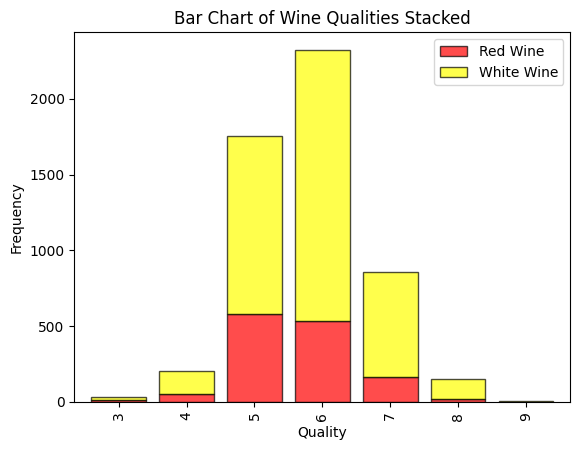

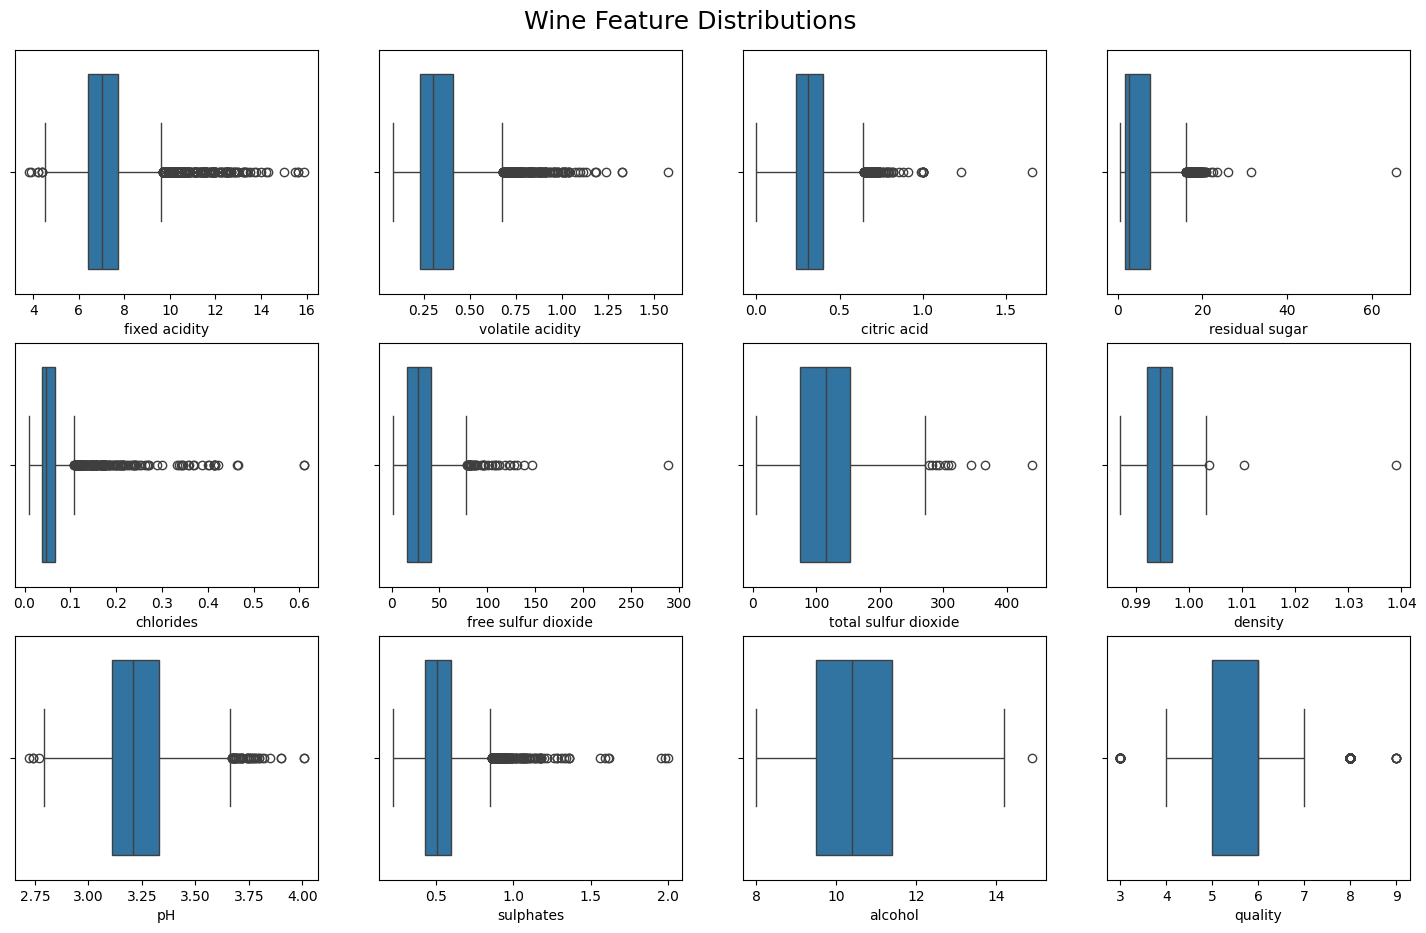

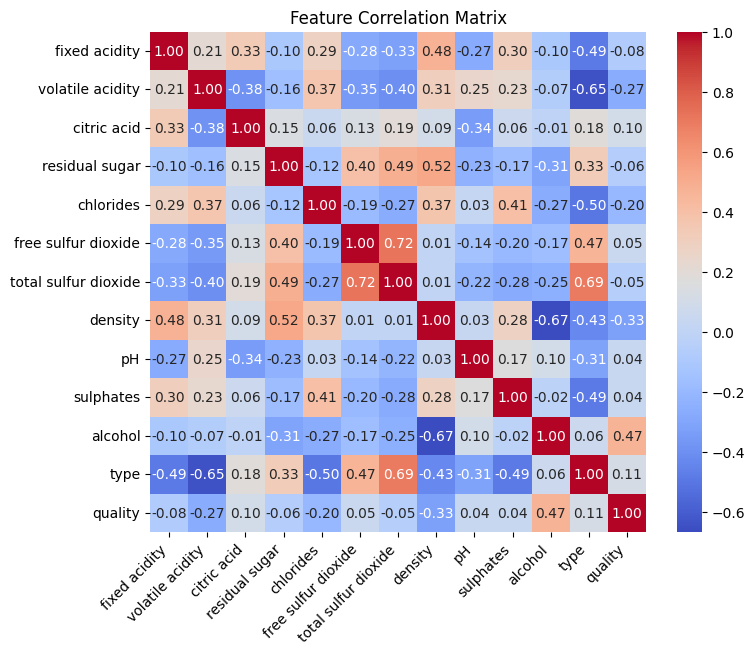

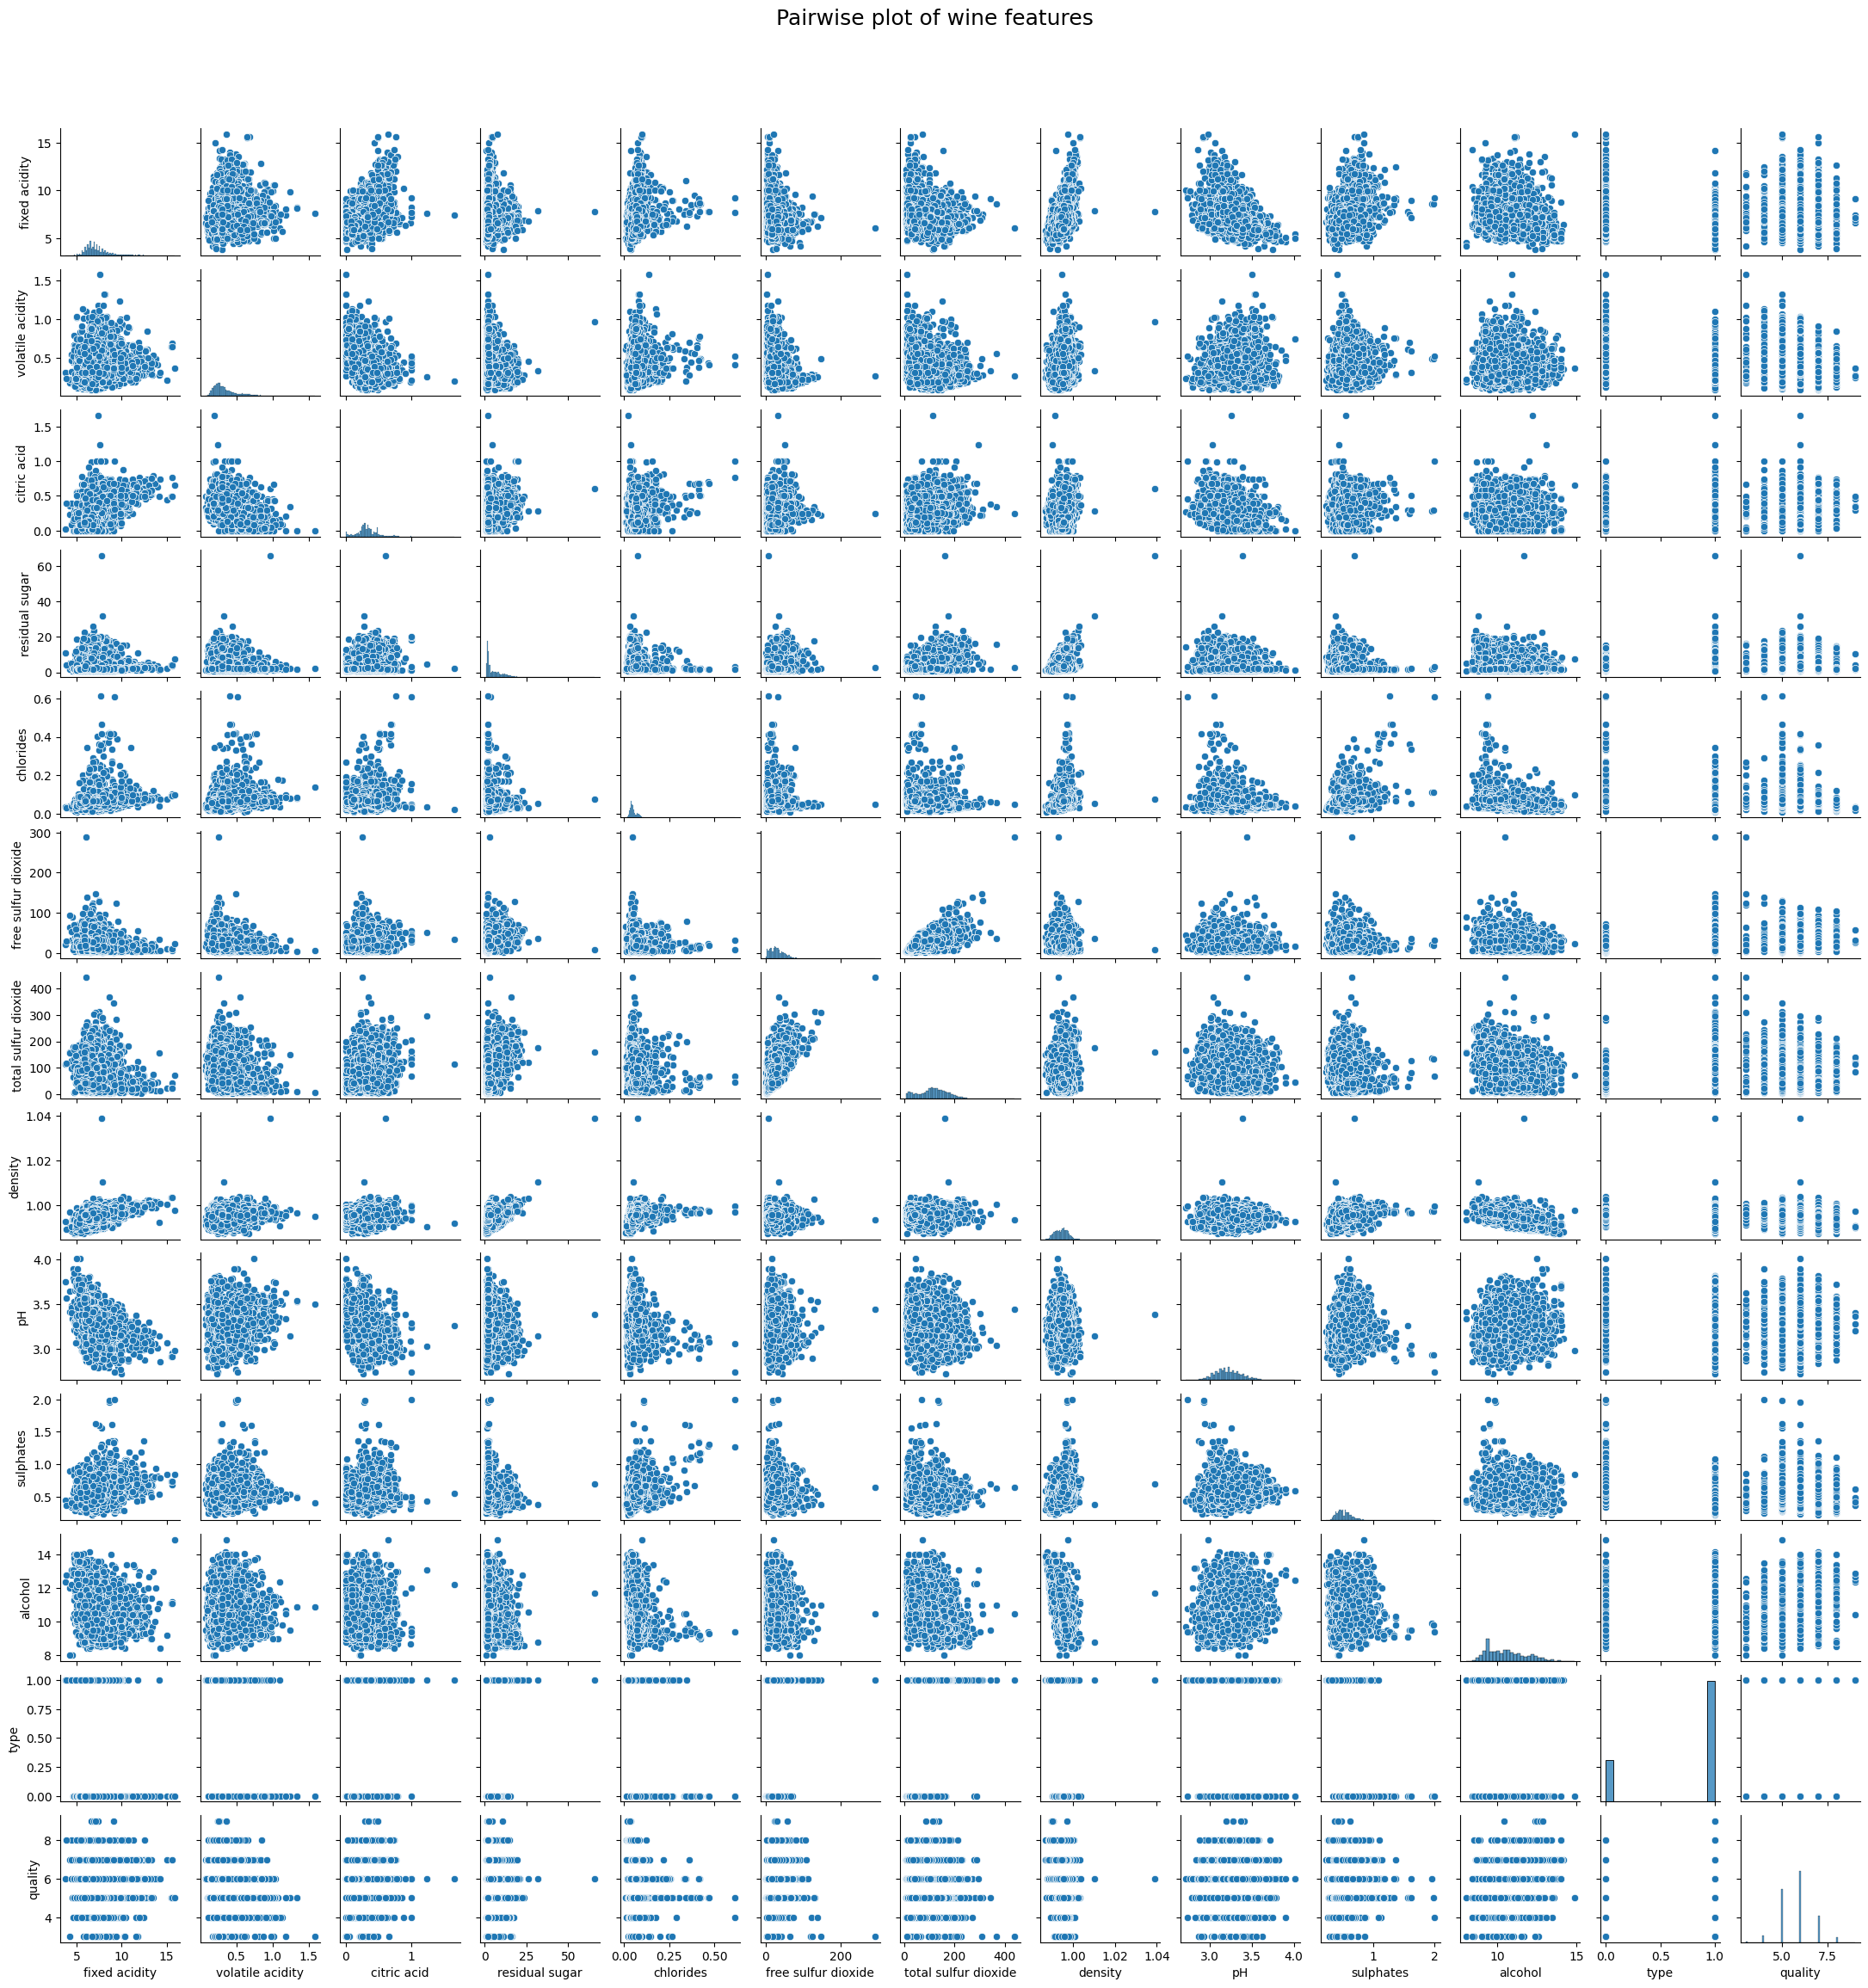

In [100]:
# Bar chart of different wine qualities
pivot_df = df.pivot_table(index='quality', columns='type', aggfunc='size', fill_value=0)
pivot_df.plot(kind='bar', stacked=True, color=['red', 'yellow'], alpha=0.7, width=0.8, edgecolor='black')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.legend(['Red Wine', 'White Wine'])
plt.title('Bar Chart of Wine Qualities Stacked')
plt.show()

# Box plots of the feature distributions
columns = df.drop(columns=['type']).columns
fig = plt.figure(figsize = (18, 10))
fig.suptitle('Wine Feature Distributions', fontsize=18)
plt.subplots_adjust(top=0.94)
for i, col in enumerate(columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x = df[col])

# Correlation matrix to examine general correlation of features
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6.5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.show()

# Pairwise plot of each feature
sns.pairplot(df, height=1.7);
plt.suptitle('Pairwise plot of wine features', y=1.05, fontsize=18);

### Data preprocessing

To ensure consistent feature handling throughout our analysis, we first stored the feature names. We then addressed outliers and feature scaling. From our visualizations (fig. 1.3, 1.4), we identified highly skewed features—residual sugar, chlorides, and total sulfur dioxide—and applied a log transformation (log1p) to reduce skewness while preserving data distribution. For extreme values, we applied Winsorization (clipping at the 1st and 99th percentiles) to chlorides and free sulfur dioxide to prevent outliers from disproportionately influencing the models. Continuous numerical features were then normalized using MinMax scaling to ensure comparability across different ranges for logistic regression and K-neighbors.

Since we aimed to classify wines into two quality groups, we binarized the quality score by setting a threshold of 7: wines with a score of 7 or higher were labeled as high quality (1), while those below 7 were labeled as low quality (0). This threshold was chosen because it represents approximately 20% of the dataset, providing a reasonable proportion to be considered better than average. Finally, we split the dataset into training and test sets, allocating 80% for training and 20% for testing.

In [9]:
# Store feature names for easy retrieval later
features = df.drop(columns=['quality']).columns

df_scaled = df.drop(columns='quality').copy()

from scipy.stats import zscore
outlier_features = df.columns[(np.abs(zscore(df)) > 3).any(axis=0)]
outlier_features = [x for x in outlier_features if x not in ['type', 'quality']]

# Log transorm to reduce skew
skewed_features = ['residual sugar', 'chlorides', 'total sulfur dioxide']
df[skewed_features] = np.log1p(df[skewed_features])

# Winsorization to remove extreme outliers
outlier_features = ['chlorides', 'free sulfur dioxide']
df[outlier_features] = np.clip(df[outlier_features], df[outlier_features].quantile(0.01), df[outlier_features].quantile(0.99), axis=0)

# Normalize continuous/numerical features
scaler = MinMaxScaler()
numerical_features = df.drop(columns=['type', 'quality']).columns
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])

X = df_scaled[features]
# Binarize quality: 1 = high, 0 = low
y = (df['quality'] >= 7).astype(int)  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline Model Analysis

To establish a performance benchmark, we trained four supervised classification models—Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), and Gradient Boosting—using their default hyperparameters. Each model was fitted to the training data, and predictions were evaluated on both the training and test sets. We measured accuracy to compare performance across models, identifying potential overfitting or underfitting. These baseline results serve as a reference point for further model tuning and optimization. Initial results indicate that all four are competitive models and so we proceeded to the next stage with all four.

- **Logistic Regression**: A linear model that estimates probabilities using a logistic function. It is highly interpretabie and serves as a good baseline, but may encounter issues if relationships are not linear.
- **Random Forest Classifier**: An ensemble of decision trees that is resistant to overfitting and is still quite interpretable. It’s also useful for handling non-linear relationships in the data.
- **K-Nearest Neighbors (KNN)**: A distance-based model that classifies samples based on their nearest neighbors. It can be effective when the decision boundary is complex.
- **Gradient Boosting Classifier**: A powerful ensemble method that sequentially corrects errors from previous models. It often achieves high accuracy but is prone to overfitting.

Each model was chosen to offer a mix of linear, tree-based, and instance-based approaches, allowing us to compare different learning paradigms before refining the best-performing model.

In [10]:
clf_models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'KNN Classifier': KNeighborsClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42)
}

for model_name, model in clf_models.items():
    model.fit(X_train, y_train)

    yp_train = model.predict(X_train)
    yp_test = model.predict(X_test)

    print(f"{model_name}:")
    print(f"\ttrain accuracy: {accuracy_score(y_train, yp_train):.5f}")
    print(f"\ttest accuracy:  {accuracy_score(y_test, yp_test):.5f}")
    print()

Logistic Regression:
	train accuracy: 0.82049
	test accuracy:  0.83835

Random Forest Classifier:
	train accuracy: 1.00000
	test accuracy:  0.83647

KNN Classifier:
	train accuracy: 0.87077
	test accuracy:  0.81861

Gradient Boosting Classifier:
	train accuracy: 0.87218
	test accuracy:  0.83553



## Hyperparameter tuning

To optimize model performance, we conducted a grid search with cross-validation to explore different hyperparameter settings for each classifier. The grid search allows us to test multiple combinations of hyperparameters for each classifier and identify the best-performing configuration. We use K-fold cross-validation to reduce the change of overfitting to the training data.

We chose hyperparameter values based on a reasonable range around the default value for each parameter.

- **Logistic Regression**: Logistic regression is sensitive to the regularization parameter C, so a broad range is tested. We focus on l2 penalty, because it is compatible with a number of different solvers.

- **Random Forest Classifier**: We tested a number of different parameters to balance depth and complexity.

- **K-Neighbors Classifier**: We tested broad range of neighbors because it is the most critical hyperparameter, in addition to different metrics for calculating distance.

- **Gradient Boosting Classifier**: We tested multiple values of number of estimators and learning rates to find a balance between overfitting and underfitting.

Following this we insert the results of all models tested of each type into a dataframe in order to compare the performance across the different types of models.

In [11]:
n_jobs = -1
kf = KFold(3, shuffle=True, random_state=42)

clf_grid = {
    'LogisticRegression': {
        'type': 'clf',
        'base_model': LogisticRegression(max_iter=1000),
        'param_grid': {
            'C': [0.1, 1, 5, 10, 20, 50, 100],
            'penalty': ['l2'],
            'solver': ['liblinear', 'saga', 'lbfgs']
        }
    },
    'RandomForestClassifier': {
        'type': 'clf',
        'base_model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'n_estimators': range(50, 201, 50),
            'max_depth': range(5, 21, 5),
            'min_samples_split': range(2, 6),
            'min_samples_leaf': range(1, 4),
            'max_features': ['sqrt', 'log2', None]
        }
    },
    'KNeighborsClassifier': {
        'type': 'clf',
        'base_model': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': range(3, 31),
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'GradientBoostingClassifier': {
        'type': 'clf',
        'base_model': GradientBoostingClassifier(random_state=42),
        'param_grid': {
            'n_estimators': range(50, 151, 50),
            'max_depth': range(3, 11),
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
        }
    }
}

# Perform the grid search and add grid object to dictionary
import time
for name, info in clf_grid.items():
    start = time.time()
    print(f"Running {name} grid search", end='')
    grid = GridSearchCV(info['base_model'], param_grid=info['param_grid'], return_train_score=True, cv=kf, n_jobs=n_jobs, verbose=3, scoring='accuracy')
    grid.fit(X_train, y_train)
    info['grid'] = grid
    print(f"... {time.time()-start:0.2f}s")

# Create a dataframe of model results
classifier_info_list = list()

for model_name, model_data in clf_grid.items():
    print(model_name)
    grid = model_data['grid']
    
    results = grid.cv_results_
    
    model_df = pd.DataFrame(results)
    
    model_df['model'] = model_name
    
    model_df['parameters'] = model_df.apply(lambda row: {param: row[f'param_{param}'] for param in model_data['param_grid'].keys()}, axis=1)
    
    columns = ['model', 'mean_train_score', 'mean_test_score', 'std_test_score', 'mean_fit_time', 'std_fit_time', 'parameters']
    model_df = model_df[columns]
    
    classifier_info_list.append(model_df)

classifier_df = pd.concat(classifier_info_list, ignore_index=True)
classifier_df = classifier_df.sort_values('mean_test_score', ascending=False) # higher is better

Running LogisticRegression grid searchFitting 3 folds for each of 21 candidates, totalling 63 fits
... 1.83s
Running RandomForestClassifier grid searchFitting 3 folds for each of 576 candidates, totalling 1728 fits
... 39.79s
Running KNeighborsClassifier grid searchFitting 3 folds for each of 112 candidates, totalling 336 fits
... 2.34s
Running GradientBoostingClassifier grid searchFitting 3 folds for each of 576 candidates, totalling 1728 fits
... 65.54s
LogisticRegression
RandomForestClassifier
KNeighborsClassifier
GradientBoostingClassifier


## Results

In this section, we present the results of our analysis and model evaluation. We begin by comparing the performance of various models to identify the top-performing ones. This comparison is followed by an analysis of the best model, including its performance metrics, confusion matrix, and feature importance.

1. Model Performance Comparison
We evaluated several supervised learning models to classify wines as "high" or "low" quality based on their chemical features. Our goal was to determine which model offers the best predictive performance.

- **Top Performing Model by Type**: To further explore model performance, we identified the top-performing model for each classifier type. The table below presents the best model of each type, along with their respective mean test accuracy scores and hyperparameters.

- **Box Plot of Mean Test Accuracy Scores**: We also visualized the distribution of mean test accuracy scores for all classifiers using a box plot. This helps to understand the variability in performance across different models and highlights the models that consistently achieve high accuracy.

2. Detailed Analysis of the Best Model
After identifying the best-performing model overall, we conducted a detailed analysis to evaluate its performance on the test set.

- **Best Model Evaluation**: The best model was selected based on its highest mean test accuracy score during cross-validation. We fitted this model with the optimal hyperparameters and evaluated its performance on the test set. The classification report and confusion matrix provide insights into the model's accuracy, precision, and recall scores.

- **Feature Importance**: Since the best model supports feature importance (Gradient Boosting / Random Forest), we analyzed the importance of each feature. This analysis helps to understand which features contribute most to the model's predictions and can offer insights into the underlying factors influencing wine quality.

### Comparing Models

Top 10 Models on Mean Test Score:


,model,mean_train_score,mean_test_score,std_test_score,mean_fit_time,std_fit_time,parameters
1283,GradientBoostingClassifier,1.000000,0.845630,0.003028,2.640688,0.043313,"{'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.2, 'subsample': 0.9}"
1277,GradientBoostingClassifier,1.000000,0.845395,0.002902,2.183181,0.027716,"{'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.2, 'subsample': 0.9}"
1229,GradientBoostingClassifier,1.000000,0.845161,0.004845,1.913352,0.014644,"{'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.2, 'subsample': 0.9}"
1100,GradientBoostingClassifier,1.000000,0.844221,0.003157,1.805682,0.078882,"{'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.1, 'subsample': 0.6}"
957,GradientBoostingClassifier,1.000000,0.843986,0.004743,2.121159,0.118912,"{'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.05, 'subsample': 0.7}"
956,GradientBoostingClassifier,0.999648,0.843986,0.002607,1.893085,0.151166,"{'n_estimators': 150, 'max_depth': 8, 'learning_rate': 0.05, 'subsample': 0.6}"
359,RandomForestClassifier,0.999883,0.843985,0.002382,0.609838,0.003944,"{'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}"
311,RandomForestClassifier,0.999883,0.843985,0.002382,0.591661,0.043991,"{'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}"
213,RandomForestClassifier,0.954065,0.843985,0.000310,0.179451,0.011345,"{'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}"
165,RandomForestClassifier,0.954065,0.843985,0.000310,0.190145,0.004548,"{'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}"


Top Models of Each Type:


,model,mean_train_score,mean_test_score,std_test_score,mean_fit_time,std_fit_time,parameters
1283,GradientBoostingClassifier,1.000000,0.845630,0.003028,2.640688,0.043313,"{'n_estimators': 150, 'max_depth': 10, 'learning_rate': 0.2, 'subsample': 0.9}"
630,KNeighborsClassifier,1.000000,0.843046,0.008121,0.006337,0.000238,"{'n_neighbors': 19, 'weights': 'distance', 'metric': 'euclidean'}"
19,LogisticRegression,0.822721,0.824718,0.001158,0.071231,0.006959,"{'C': 100.0, 'penalty': 'l2', 'solver': 'saga'}"
359,RandomForestClassifier,0.999883,0.843985,0.002382,0.609838,0.003944,"{'n_estimators': 150, 'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2'}"


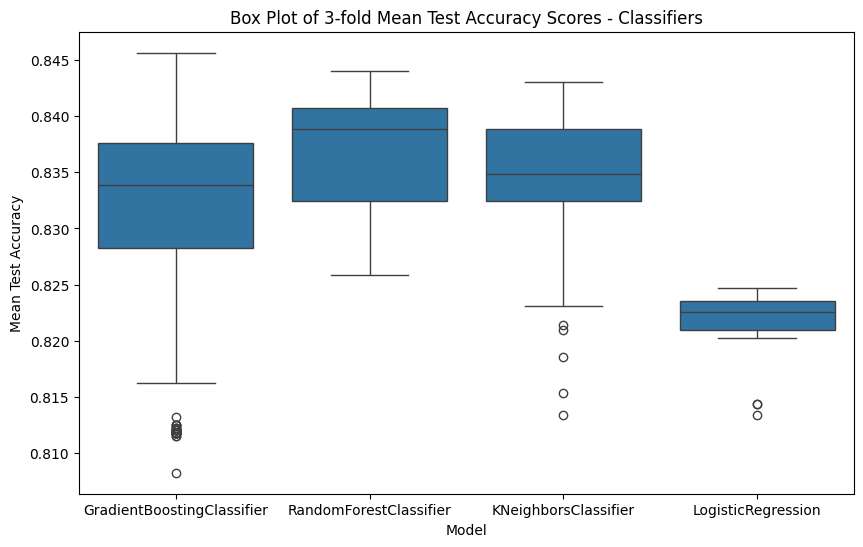

In [ ]:
# Top models by type
print("Top Models of Each Type:")
display(classifier_df.loc[classifier_df.groupby('model')['mean_test_score'].idxmax()].head())

# Box plot of model performance by type
plt.figure(figsize=(10, 6))
sns.boxplot(x='model', y='mean_test_score', data=classifier_df)
plt.title(f'Box Plot of {kf.get_n_splits()}-fold Mean Test Accuracy Scores - Classifiers')
plt.xlabel('Model')
plt.ylabel('Mean Test Accuracy')
plt.show()

### Top performing model

Best model: GradientBoostingClassifier
Best parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 150, 'subsample': 0.9}
Train accuracy: 1.00000
Test accuracy: 0.84398
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       856
           1       0.65      0.43      0.52       208

    accuracy                           0.84      1064
   macro avg       0.76      0.69      0.71      1064
weighted avg       0.83      0.84      0.83      1064

[0.05201394 0.08305488 0.07066253 0.07767116 0.07904833 0.08889096
 0.08136669 0.08922199 0.07224073 0.08942559 0.21377174 0.00263147]


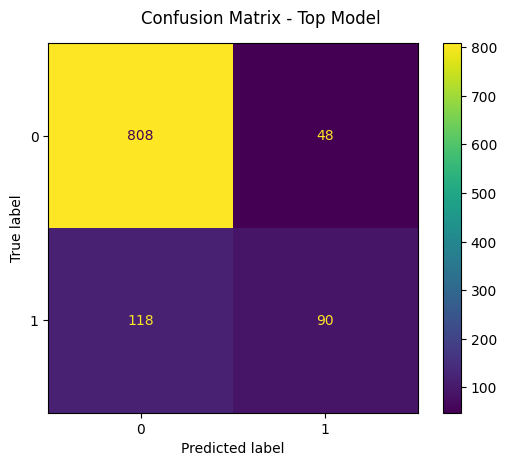

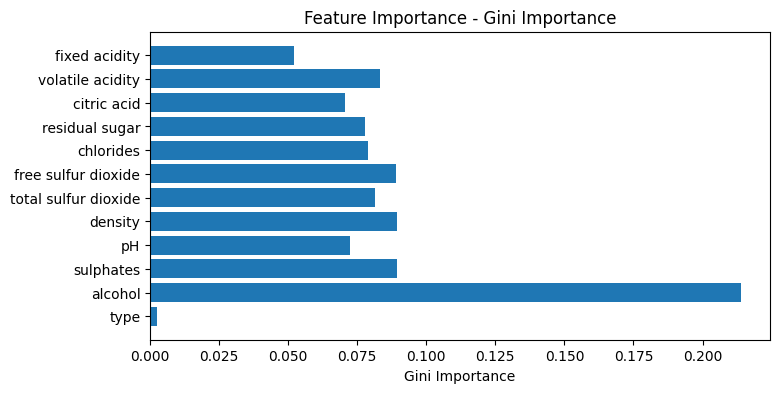

In [ ]:
# Train top model
best_clf_name, best_clf_params = classifier_df.iloc[0][['model', 'parameters']]
model_clf = clf_grid[best_clf_name]['base_model']
model_clf.set_params(**best_clf_params).fit(X_train, y_train)

# Predict
yp_train = model_clf.predict(X_train)
yp_test = model_clf.predict(X_test)

# Report model performance on train and test sets
print(f"Best model: {type(model_clf).__name__}")
print(f"Best parameters: {clf_grid[best_clf_name]['grid'].best_params_}")
print(f"Train accuracy: {accuracy_score(y_train, yp_train):.5f}")
print(f"Test accuracy: {accuracy_score(y_test, yp_test):.5f}")
print(classification_report(y_test, yp_test))

# Display test results in confusion matrix
cm = confusion_matrix(y_test, yp_test)
cmd = ConfusionMatrixDisplay(cm).plot();
plt.suptitle("Confusion Matrix - Top Model", y=0.95)

# Bar plot of feature importance from best model
print(model_clf.feature_importances_)
importances = model_clf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
plt.figure(figsize=(8, 4))
plt.barh(features, importances)
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

## Conclusions

Model Results
One of the Gradient Boosting Classifier models emerged as the top-performing model during our testing, with a respectable accuracy score of 0.835. However, upon examining the box plot of performance of all models tested, the Random Forest Classifier appears to be a more consistent predictor, with a higher mean and floor. Overall, all models performed well in training, but due to its highest mean score and relative lack of outlying model scores, if we were to choose a model for this task, we would select the Random Forest Classifier over the others.

By far, the best individual feature for predicting quality appears to be alcohol content. This raises the question of whether people truly enjoy higher alcohol wines or if perhaps imbibing higher alcohol wine puts one in a more generous mood when assigning a rating. Though the answer is outside the scope of this study, we recommend interested readers test this out—responsibly and in moderation, of course.

Model Limitations
It is important to note that while the accuracy score is quite good, the model performs far better in predicting "low" quality wines than "high" quality wines. The top model's precision of 0.65 and recall of 0.43 for the "high" category are both rather unimpressive. This indicates that the model struggles to accurately identify high-quality wines, potentially missing a significant number of true high-quality samples (low recall) and incorrectly labeling low-quality wines as high-quality (moderate precision). It seems possible that these chemical features are inadequate for judging the lower end of the high-quality category and are mixing up wines that had an original score of 6 or 7. It's also possible that a more advanced model could discover underlying relationships that could better predict the quality.

## References


Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

Feature Importance with Random Forests. (05 Apr, 2024)
https://www.geeksforgeeks.org/feature-importance-with-random-forests/

Lundy, Daniel. (2023-07-09). A Practical Guide to Wine Quality Prediction using Logistic Regression. https://medium.com/@daniel.lundy.analyst/a-practical-guide-to-wine-quality-prediction-using-logistic-regression-f390c5c4d71f.

Yagci, Hasan Ersan. (Jan 15, 2021). Detecting and Handling Outliers with Pandas. https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8